## Bike Details EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df1 = pd.read_csv("E:\BIKE DETAILS.csv")
df1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0



1. What is the range of selling prices in the dataset?



In [3]:
a = df1['selling_price'].max()
a

np.int64(760000)

In [4]:
b = df1['selling_price'].min()
b

np.int64(5000)

In [5]:
selling_price_range =  a-b
print("The Range of selling price is",selling_price_range)

The Range of selling price is 755000


2. What is the median selling price for bikes in the dataset?



In [6]:
c = np.median(df1['selling_price'])
print("The Median of selling price is",c)

The Median of selling price is 45000.0


3. What is the most common seller type?



In [7]:
df1.columns


Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [8]:
df1['seller_type'].value_counts().idxmax()

'Individual'

4. How many bikes have driven more than 50,000 kilometers?



In [9]:
df1['km_driven']

0          350
1         5650
2        12000
3        23000
4        21000
         ...  
1056    500000
1057     33000
1058     35000
1059     53000
1060     92233
Name: km_driven, Length: 1061, dtype: int64

In [10]:
df1_km = df1['km_driven'] >= 50000
df1_km

0       False
1       False
2       False
3       False
4       False
        ...  
1056     True
1057    False
1058    False
1059     True
1060     True
Name: km_driven, Length: 1061, dtype: bool

In [11]:
df1_km.sum()

np.int64(207)

5. What is the average km_driven value for each ownership type?

In [12]:
avg_km_drive_by_each_ownwer = df1.groupby('owner').agg({'km_driven':'mean'})
avg_km_drive_by_each_ownwer


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


6. What proportion of bikes are from the year 2015 or older?

In [13]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [14]:
df1.year

0       2019
1       2017
2       2018
3       2015
4       2011
        ... 
1056    2010
1057    2012
1058    2013
1059    2009
1060    2008
Name: year, Length: 1061, dtype: int64

In [15]:
data = (df1['year'] <=2015).mean()
data

np.float64(0.5664467483506126)

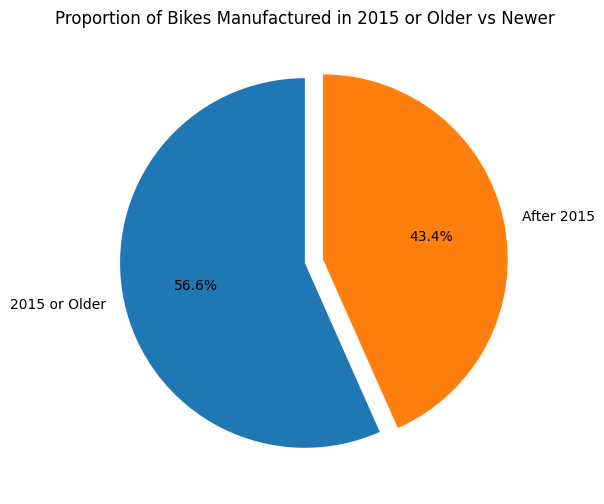

In [16]:
# Create counts instead of proportion
count_2015_or_older = (df1['year'] <= 2015).sum()
count_newer = (df1['year'] > 2015).sum()

# Labels and values
labels = ['2015 or Older', 'After 2015']
sizes = [count_2015_or_older, count_newer]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',explode=(0,0.1),
    startangle=90
)
plt.title('Proportion of Bikes Manufactured in 2015 or Older vs Newer')
plt.show()




7. What is the trend of missing values across the dataset?



In [17]:
miss_data = df1.isnull().sum()
print(miss_data)

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


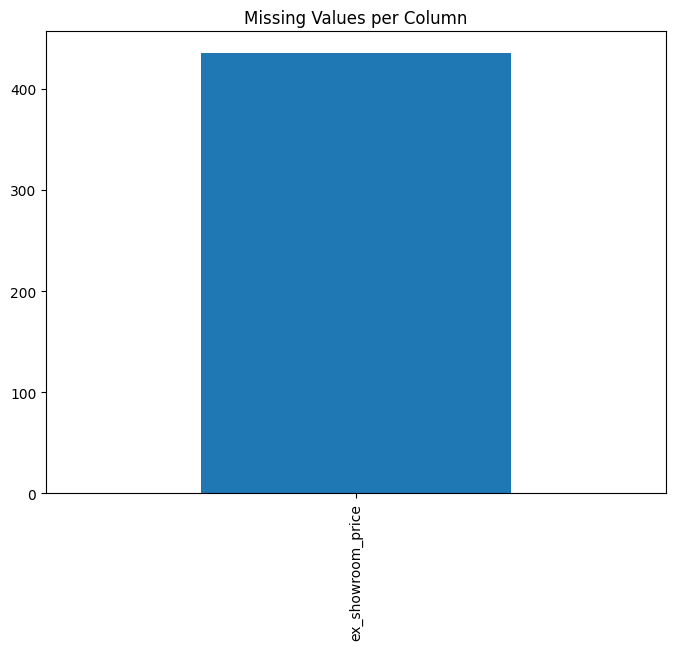

In [18]:
plt.figure(figsize=(8,6))
miss_data[miss_data>0].plot(kind = 'bar')
plt.title("Missing Values per Column")
plt.show()

8. What is the highest ex_showroom_price recorded, and for which bike?



In [19]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [20]:
df1[['name', 'ex_showroom_price']].sort_values(by='ex_showroom_price', ascending=False).head(1)


,name,ex_showroom_price
134,Harley-Davidson Street Bob,1278000.0


9. What is the total number of bikes listed by each seller type?



In [21]:
total_bikes = df1['seller_type'].value_counts()
total_bikes

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

10. What is the relationship between selling_price and km_driven for first-owner bikes?



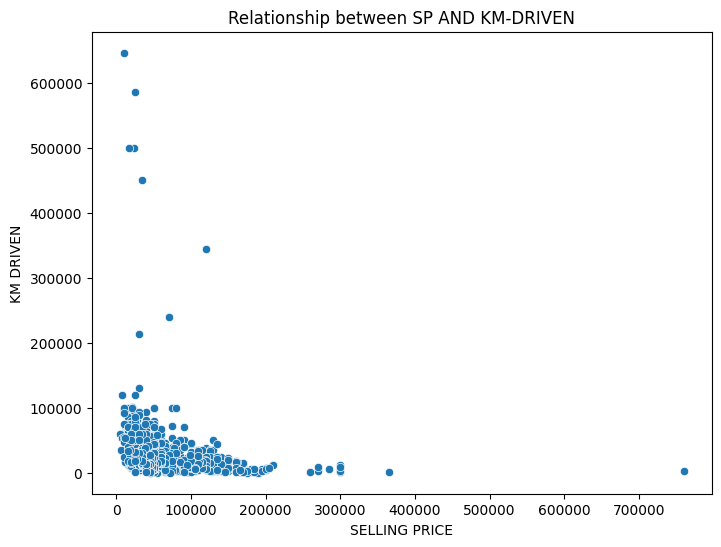

In [22]:
df_bike = df1[df1['owner'] == '1st owner']
plt.figure(figsize=(8,6))
sns.scatterplot(x='selling_price', y= 'km_driven', data=df_bike)
plt.xlabel('SELLING PRICE')
plt.ylabel("KM DRIVEN")
plt.title("Relationship between SP AND KM-DRIVEN")
plt.show()

11. Identify and remove outliers in the km_driven column using the IQR method.



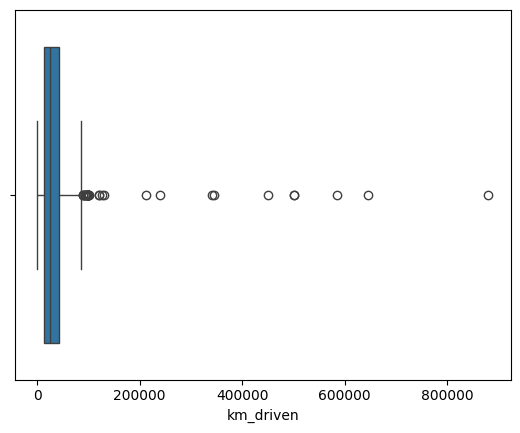

In [23]:
sns.boxplot(x = 'km_driven',data=df1)
plt.show()

In [24]:
Q1 = df1['km_driven'].quantile(0.25)
Q3 = df1['km_driven'].quantile(0.75)
IQR = Q3-Q1


In [25]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_bike_no_out = df_bike[(df_bike['km_driven'] >= lower_bound) & (df_bike['km_driven'] <= upper_bound)]
print("Original shape:", df_bike.shape, "After removing outliers:", df_bike_no_out.shape)

Original shape: (924, 7) After removing outliers: (892, 7)


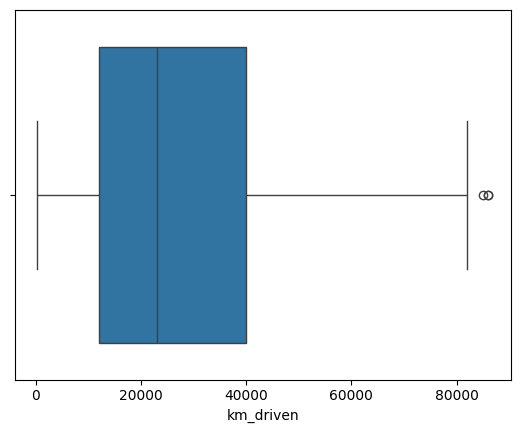

In [26]:
sns.boxplot(x = 'km_driven',data=df_bike_no_out)
plt.show()

12. Perform a bivariate analysis to visualize the relationship between year and selling_price.


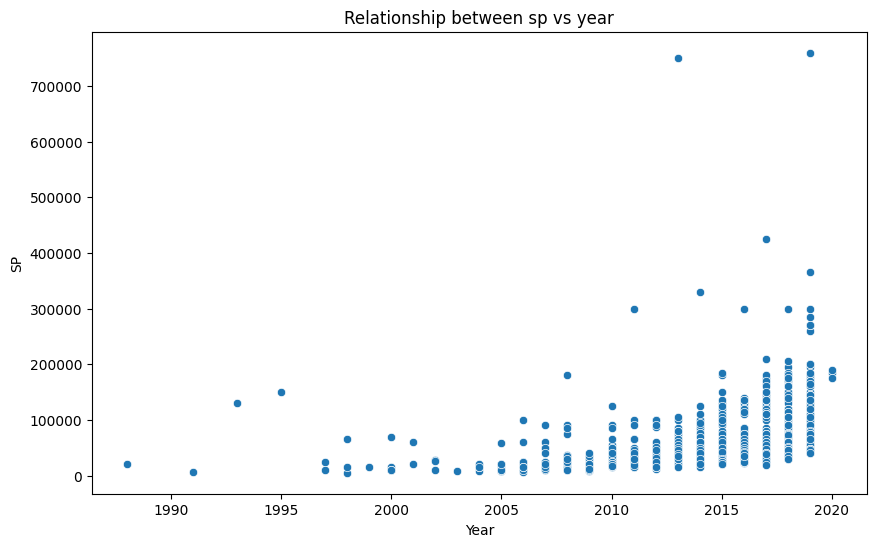

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'year', y = 'selling_price', data=df1)
plt.xlabel('Year')
plt.ylabel('SP')
plt.title('Relationship between sp vs year')
plt.show()

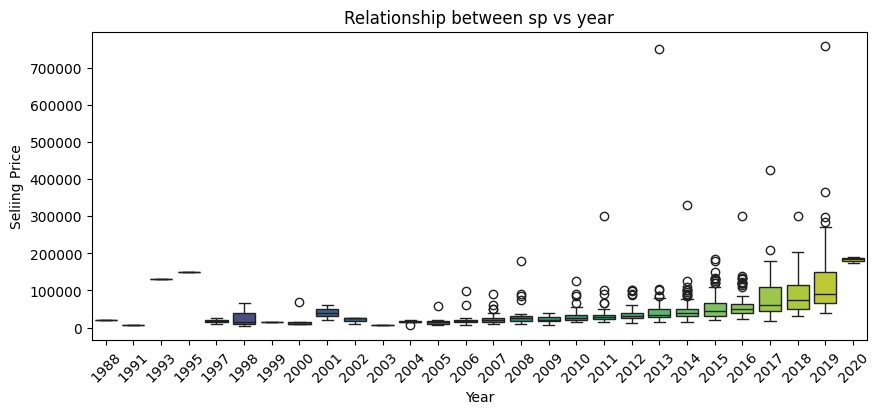

In [28]:
plt.figure(figsize=(10,4))
sns.boxplot(x='year', y='selling_price', data=df1,palette='viridis')
plt.xlabel('Year')
plt.ylabel('Seliing Price')
plt.title('Relationship between sp vs year')
plt.xticks(rotation=45)
plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?


In [29]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [30]:
a = df1['ex_showroom_price'] - df1['selling_price']
a


0           NaN
1           NaN
2       -1886.0
3       24643.0
4           NaN
         ...   
1056    35000.0
1057    35000.0
1058    42000.0
1059    46000.0
1060    65000.0
Length: 1061, dtype: float64

In [31]:
b = 2025 - df1['year']
b


0        6
1        8
2        7
3       10
4       14
        ..
1056    15
1057    13
1058    12
1059    16
1060    17
Name: year, Length: 1061, dtype: int64

In [32]:
# depreciation per year
depreciation = a/b
depreciation

0               NaN
1               NaN
2       -269.428571
3       2464.300000
4               NaN
           ...     
1056    2333.333333
1057    2692.307692
1058    3500.000000
1059    2875.000000
1060    3823.529412
Length: 1061, dtype: float64

In [33]:
df1['depreciation'] = depreciation
df1['age'] = b

df1[['name','age','depreciation']].head()

,name,age,depreciation
0,Royal Enfield Classic 350,6,NaN
1,Honda Dio,8,NaN
2,Royal Enfield Classic Gunmetal Grey,7,-269.428571
3,Yamaha Fazer FI V 2.0 [2016-2018],10,2464.300000
4,Yamaha SZ [2013-2014],14,NaN


In [34]:
avg_dep_by_age = df1.groupby('age')['depreciation'].mean()
print(avg_dep_by_age)

age
5    -6852.000000
6      492.427083
7     1860.456401
8     2788.260294
9     3147.576720
10    2801.327500
11    3136.873278
12    3590.573899
13    2870.588358
14    3364.476190
15    3043.928571
16    2389.236607
17    3219.554622
18    2355.500000
19    2087.605263
20    2242.600000
21    1754.857143
22            NaN
23            NaN
24    1452.166667
25            NaN
26            NaN
27            NaN
28            NaN
30            NaN
32            NaN
34            NaN
37            NaN
Name: depreciation, dtype: float64


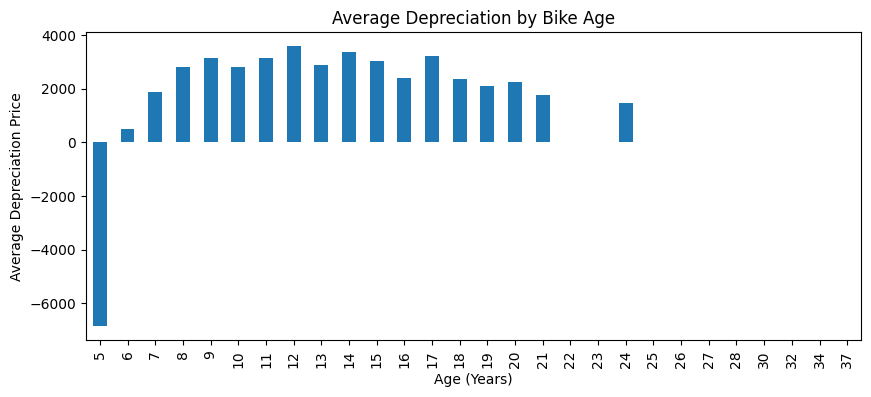

In [35]:
avg_dep_by_age.plot(kind='bar', figsize=(10,4))
plt.title("Average Depreciation by Bike Age")
plt.xlabel("Age (Years)")
plt.ylabel("Average Depreciation Price")
plt.show()


14. Which bike names are priced significantly above the average price for their manufacturing year?



In [36]:
df1.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price', 'depreciation', 'age'],
      dtype='object')

In [37]:
stats_by_year = df_bike.groupby('year')['selling_price'].agg(['mean','std']).reset_index()
df_bike = df_bike.merge(stats_by_year, on='year', how='left', suffixes=('','_year'))

high_priced = df_bike[df_bike['selling_price'] > df_bike['mean'] + 1.5*df_bike['std']]
high_priced[['name','year','selling_price','mean','std']]


,name,year,selling_price,mean,std
10,Yamaha YZF R3,2019,365000,118979.976471,97051.813930
30,Honda CBR-250R,2016,120000,59396.684211,36869.038033
34,KTM 390 Duke,2017,175000,76934.426230,41344.098823
45,Royal Enfield Bullet 350,2014,90000,46852.000000,22236.616746
52,Royal Enfield Thunderbird 350,2013,85000,42469.696970,19696.325075
...,...,...,...,...,...
840,KTM 390 Duke,2016,115000,59396.684211,36869.038033
844,Royal Enfield Classic 350,2015,110000,55506.024096,31060.669780
847,Royal Enfield Thunder 500,2015,105000,55506.024096,31060.669780
849,Royal Enfield Thunder 350,2013,105000,42469.696970,19696.325075


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.


In [38]:
corr = df1.corr(numeric_only=True)
corr

,selling_price,year,km_driven,ex_showroom_price,depreciation,age
selling_price,1.000000,0.402188,-0.212937,0.918583,0.383799,-0.402188
year,0.402188,1.000000,-0.288675,0.126378,-0.148647,-1.000000
km_driven,-0.212937,-0.288675,1.000000,-0.122011,0.012413,0.288675
ex_showroom_price,0.918583,0.126378,-0.122011,1.000000,0.698461,-0.126378
depreciation,0.383799,-0.148647,0.012413,0.698461,1.000000,0.148647
age,-0.402188,-1.000000,0.288675,-0.126378,0.148647,1.000000


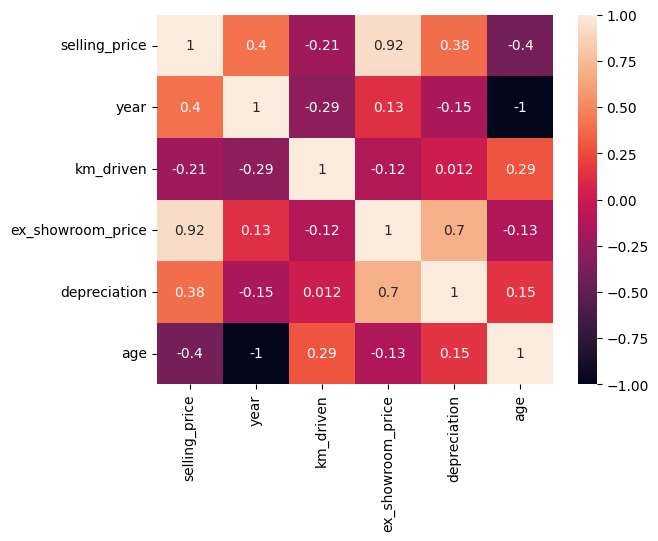

In [39]:
sns.heatmap(data=corr,annot=True)
plt.show()

## Car sale EDA 


In [40]:
df2 = pd.read_csv("E:\Car Sale.csv")
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?



In [41]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [42]:
df2['Dealer_Name']

0        Buddy Storbeck's Diesel Service Inc
1                           C & M Motors Inc
2                                Capitol KIA
3                     Chrysler of Tri-Cities
4                          Chrysler Plymouth
                        ...                 
23901                       C & M Motors Inc
23902         Ryder Truck Rental and Leasing
23903                 Chrysler of Tri-Cities
23904                      Chrysler Plymouth
23905                        Pars Auto Sales
Name: Dealer_Name, Length: 23906, dtype: object

In [43]:
df2_sp = df2.groupby('Dealer_Name').agg({'Price ($)':'mean'}).sort_values(by = 'Price ($)',ascending=False)
df2_sp

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?







In [44]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [45]:
df2['Company']

0             Ford
1            Dodge
2         Cadillac
3           Toyota
4            Acura
           ...    
23901     Plymouth
23902    Chevrolet
23903          BMW
23904    Chevrolet
23905        Lexus
Name: Company, Length: 23906, dtype: object

In [46]:
df2_sp = df2.groupby('Company')['Price ($)'].var().sort_values(ascending=False)
df2_sp

Company
Lincoln       3.864389e+08
Saab          3.862695e+08
Cadillac      3.809180e+08
Plymouth      3.635123e+08
Lexus         3.187269e+08
Buick         2.938561e+08
Mercury       2.704437e+08
Nissan        2.629024e+08
Saturn        2.556873e+08
Ford          2.511937e+08
Mercedes-B    2.472067e+08
Oldsmobile    2.468464e+08
Toyota        2.361487e+08
BMW           2.269717e+08
Pontiac       2.058928e+08
Infiniti      1.875895e+08
Chevrolet     1.771844e+08
Volvo         1.672829e+08
Subaru        1.669463e+08
Audi          1.665195e+08
Volkswagen    1.569288e+08
Mitsubishi    1.362202e+08
Chrysler      1.341725e+08
Dodge         1.251622e+08
Honda         1.242919e+08
Jaguar        1.045002e+08
Jeep          8.948847e+07
Acura         6.696225e+07
Porsche       2.768695e+07
Hyundai       1.215208e+07
Name: Price ($), dtype: float64

3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?



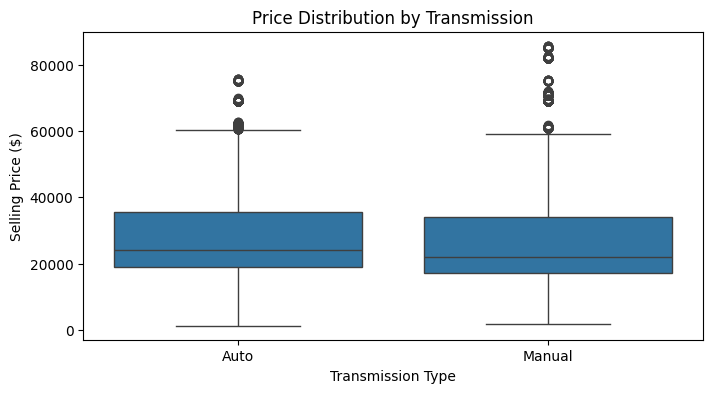

In [47]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Transmission', y='Price ($)', data=df2)
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price ($)")
plt.title("Price Distribution by Transmission")
plt.show()


In [48]:
iqr = df2.groupby('Transmission')['Price ($)'].quantile([0,0.25,0.5,0.75]).unstack()
iqr['IQR'] = iqr[0.75] - iqr[0.25]

iqr


,0.0,0.25,0.5,0.75,IQR
Transmission,,,,,
Auto,1200.0,19000.0,24000.0,35500.0,16500.0
Manual,1700.0,17000.0,22001.0,34000.0,17000.0


4. What is the distribution of car prices across different regions?



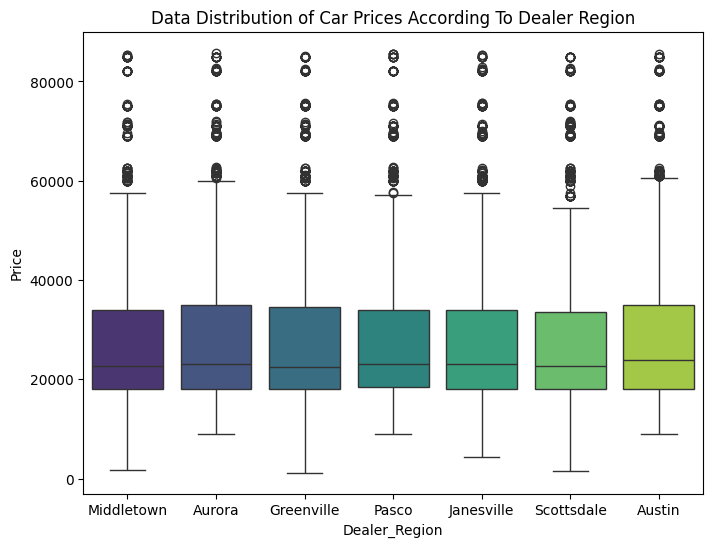

In [49]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Dealer_Region', y = 'Price ($)',data=df2,palette='viridis')
plt.xlabel("Dealer_Region")
plt.ylabel('Price')
plt.title("Data Distribution of Car Prices According To Dealer Region")
plt.show()

5. What is the distribution of cars based on body styles?



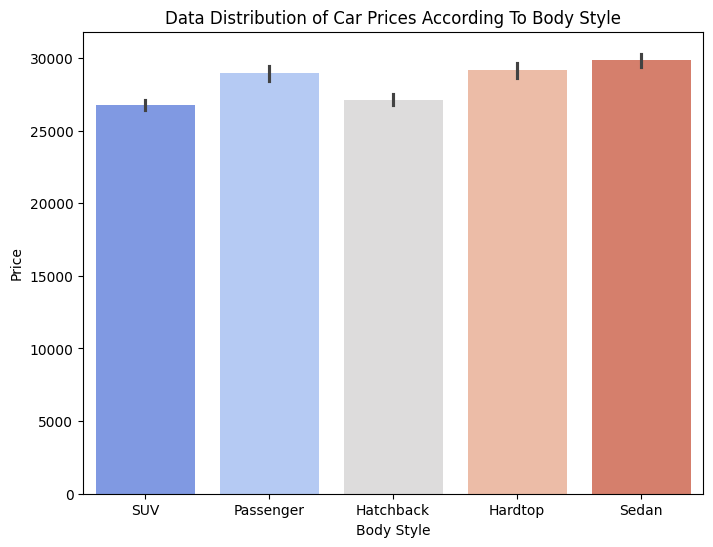

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'Body Style', y = 'Price ($)',data=df2,palette='coolwarm')
plt.xlabel("Body Style")
plt.ylabel('Price')
plt.title("Data Distribution of Car Prices According To Body Style")
plt.show()

6. How does the average selling price of cars vary by customer gender and annual income?


In [51]:
df2[['Gender','Annual Income','Price ($)']]

,Gender,Annual Income,Price ($)
0,Male,13500,26000
1,Male,1480000,19000
2,Male,1035000,31500
3,Male,13500,14000
4,Male,1465000,24500
...,...,...,...
23901,Male,13500,12000
23902,Female,900000,16000
23903,Male,705000,21000
23904,Male,13500,31000


In [52]:
df2['Income_Bin'] = pd.qcut(df2['Annual Income'], 4, labels=['Low','Mid-Low','Mid-High','High'])

avg_price_gender_income = df2.groupby(['Gender','Income_Bin'])['Price ($)'].mean()
print(avg_price_gender_income)


Gender  Income_Bin
Female  Low           28059.801521
        Mid-Low       28353.154717
        Mid-High      28309.448449
        High          28402.914851
Male    Low           27924.524014
        Mid-Low       27837.224550
        Mid-High      28283.473409
        High          28091.421784
Name: Price ($), dtype: float64



7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?



In [53]:
region_counts = df2['Dealer_Region'].value_counts()
print(region_counts)

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Greenville    3128
Middletown    3128
Name: count, dtype: int64


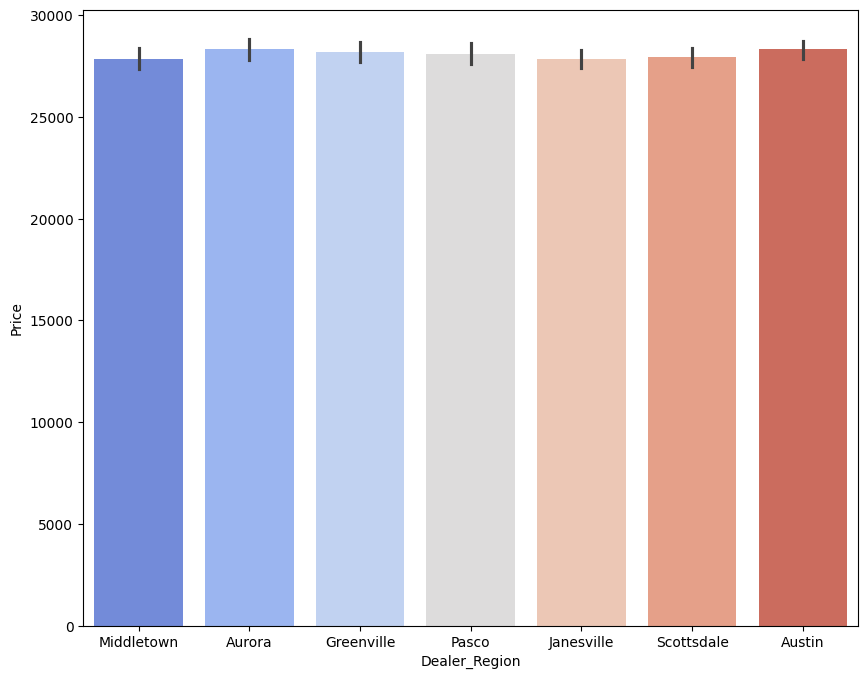

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x = 'Dealer_Region',y = 'Price ($)',data=df2,palette='coolwarm')
plt.xlabel('Dealer_Region')
plt.ylabel('Price')
plt.show()

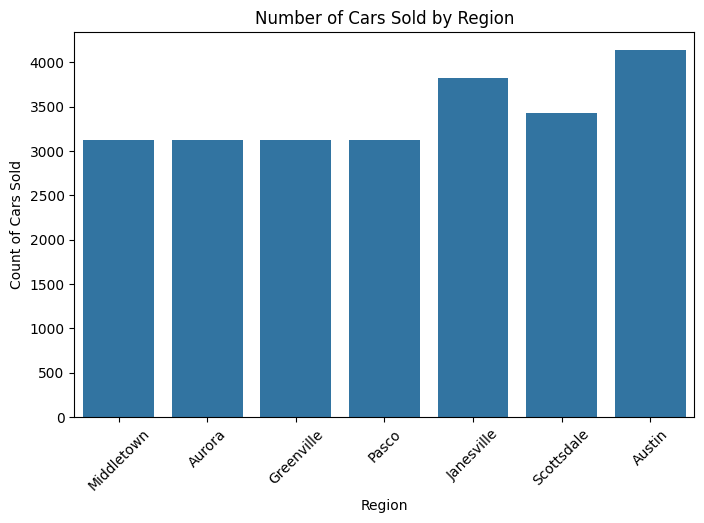

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='Dealer_Region', data=df2)
plt.title("Number of Cars Sold by Region")
plt.xlabel("Region")
plt.ylabel("Count of Cars Sold")
plt.xticks(rotation=45)
plt.show()


8. How does the average car price differ between cars with different engine sizes?



In [56]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bin'],
      dtype='object')

In [57]:
df2[['Price ($)','Engine']]

,Price ($),Engine
0,26000,DoubleÂ Overhead Camshaft
1,19000,DoubleÂ Overhead Camshaft
2,31500,Overhead Camshaft
3,14000,Overhead Camshaft
4,24500,DoubleÂ Overhead Camshaft
...,...,...
23901,12000,Overhead Camshaft
23902,16000,DoubleÂ Overhead Camshaft
23903,21000,Overhead Camshaft
23904,31000,DoubleÂ Overhead Camshaft


In [58]:
avg_car_size = df2.groupby('Engine')['Price ($)'].mean()
avg_car_size

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64

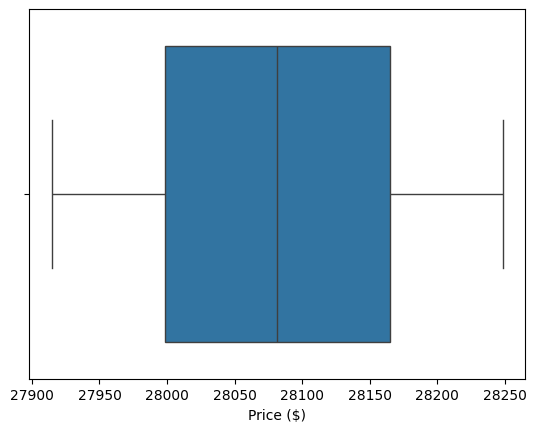

In [59]:
sns.boxplot(x = avg_car_size,data=df2)
plt.show()

8. How do car prices vary based on the customer's annual income bracket?



In [60]:
df2[['Annual Income','Price ($)']]

,Annual Income,Price ($)
0,13500,26000
1,1480000,19000
2,1035000,31500
3,13500,14000
4,1465000,24500
...,...,...
23901,13500,12000
23902,900000,16000
23903,705000,21000
23904,13500,31000


In [61]:
avg_price_per_income = df2.groupby('Annual Income')['Price ($)'].quantile([0,0.25,0.5,0.75]).unstack()
avg_price_per_income

,0.00,0.25,0.50,0.75
Annual Income,,,,
10080,22801.0,22801.0,22801.0,22801.0
13500,1200.0,18000.0,22001.0,34000.0
24000,61001.0,61001.0,61001.0,61001.0
85000,43000.0,43000.0,43000.0,43000.0
106000,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...
6600000,39000.0,39000.0,39000.0,39000.0
6800000,15000.0,15000.0,15000.0,15000.0
7650000,21000.0,21000.0,21000.0,21000.0


In [62]:
avg_price_per_income.columns = ['Min', 'Q1', 'Median', 'Q3']
avg_price_per_income


,Min,Q1,Median,Q3
Annual Income,,,,
10080,22801.0,22801.0,22801.0,22801.0
13500,1200.0,18000.0,22001.0,34000.0
24000,61001.0,61001.0,61001.0,61001.0
85000,43000.0,43000.0,43000.0,43000.0
106000,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...
6600000,39000.0,39000.0,39000.0,39000.0
6800000,15000.0,15000.0,15000.0,15000.0
7650000,21000.0,21000.0,21000.0,21000.0


10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?



In [63]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bin'],
      dtype='object')

In [64]:
df2[['Model','Price ($)']]

,Model,Price ($)
0,Expedition,26000
1,Durango,19000
2,Eldorado,31500
3,Celica,14000
4,TL,24500
...,...,...
23901,Voyager,12000
23902,Prizm,16000
23903,328i,21000
23904,Metro,31000


In [65]:
car_model = df2.groupby('Model')['Price ($)'].max().sort_values(ascending=False)
d = car_model.head(5)
d

Model
Eldorado    85800
RAV4        85600
A6          85500
S-Class     85250
Malibu      82800
Name: Price ($), dtype: int64

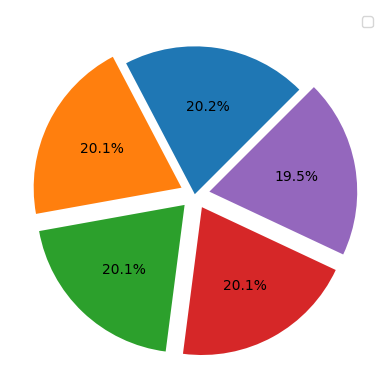

In [66]:
plt.pie(data=df2,x = d, autopct= '%1.1f%%',explode=(0,0.1,0.1,0.1,0.1),startangle=45)
plt.legend()
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?



In [67]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bin'],
      dtype='object')

In [68]:
df2[['Price ($)','Color','Engine']]

,Price ($),Color,Engine
0,26000,Black,DoubleÂ Overhead Camshaft
1,19000,Black,DoubleÂ Overhead Camshaft
2,31500,Red,Overhead Camshaft
3,14000,Pale White,Overhead Camshaft
4,24500,Red,DoubleÂ Overhead Camshaft
...,...,...,...
23901,12000,Red,Overhead Camshaft
23902,16000,Black,DoubleÂ Overhead Camshaft
23903,21000,Red,Overhead Camshaft
23904,31000,Black,DoubleÂ Overhead Camshaft


In [69]:
car_price_varies_with_color_and_engine = df2.groupby('Color')['Price ($)'].var().sort_values(ascending=False)
car_price_varies_with_color_and_engine

Color
Red           2.408506e+08
Black         2.336638e+08
Pale White    1.981717e+08
Name: Price ($), dtype: float64

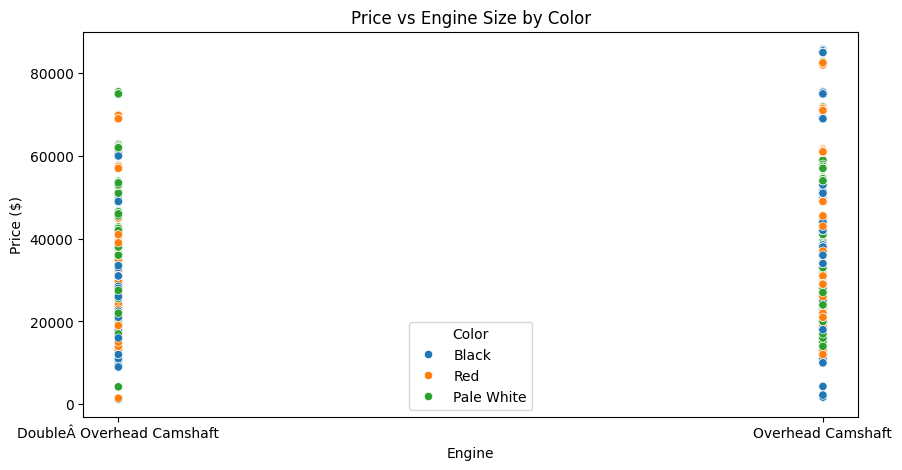

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df2)
plt.title("Price vs Engine Size by Color")
plt.show()


12. Is there any seasonal trend in car sales based on the date of sale?



In [71]:
df2.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_Bin'],
      dtype='object')

In [72]:
df2[['Date','Car_id']]

,Date,Car_id
0,1/2/2022,C_CND_000001
1,1/2/2022,C_CND_000002
2,1/2/2022,C_CND_000003
3,1/2/2022,C_CND_000004
4,1/2/2022,C_CND_000005
...,...,...
23901,12/31/2023,C_CND_023902
23902,12/31/2023,C_CND_023903
23903,12/31/2023,C_CND_023904
23904,12/31/2023,C_CND_023905


In [73]:
df2['Day'] = df2['Date'].str.split('/').str[1]
df2['Month'] = df2['Date'].str.split('/').str[0]
df2['Year'] = df2['Date'].str.split('/').str[2]

In [74]:
df2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Income_Bin,Day,Month,Year
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Low,2,1,2022
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,High,2,1,2022
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Mid-High,2,1,2022
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Low,2,1,2022
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,High,2,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco,Low,31,12,2023
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown,Mid-High,31,12,2023
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale,Mid-Low,31,12,2023
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin,Low,31,12,2023


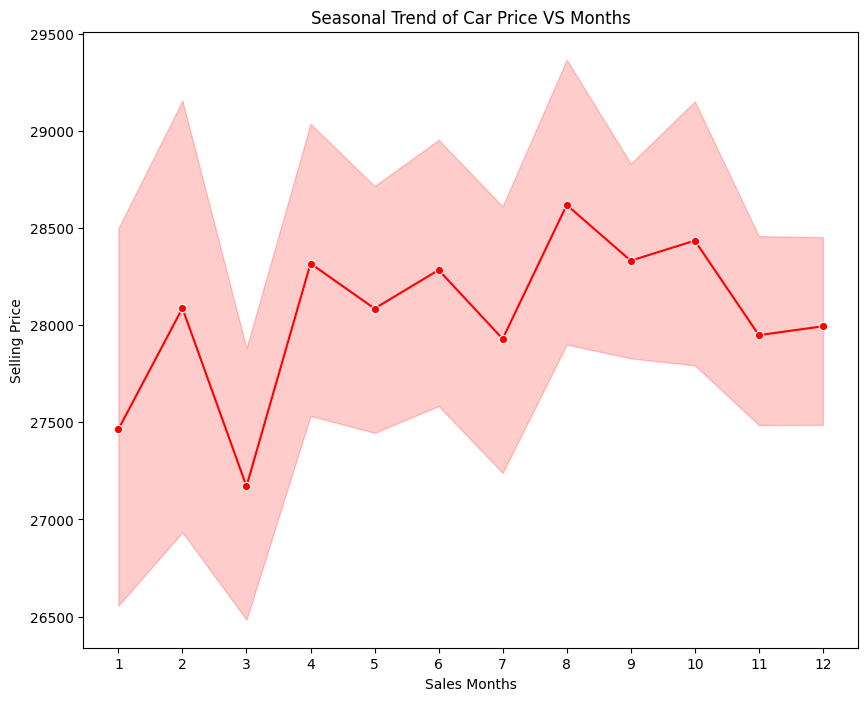

In [75]:
plt.figure(figsize=(10,8))
sns.lineplot(x = 'Month', y = 'Price ($)',data=df2,color = 'red',marker='o')
plt.xlabel('Sales Months')
plt.ylabel("Selling Price")
plt.title("Seasonal Trend of Car Price VS Months")
plt.show()

13. How does the car price distribution change when considering different combinations of body style and transmission type?



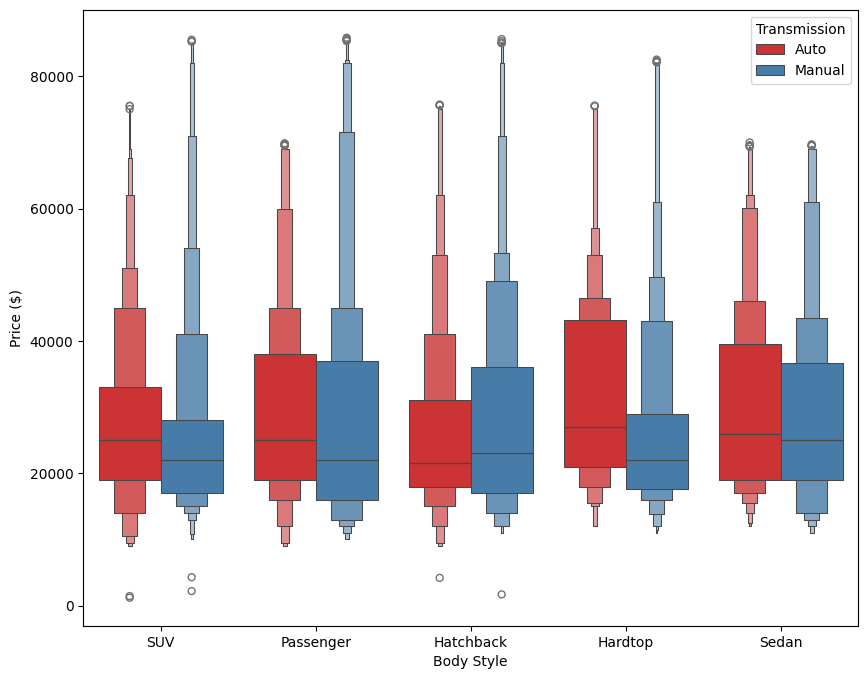

In [76]:
plt.figure(figsize=(10,8))
sns.boxenplot(x = 'Body Style', y = 'Price ($)', hue='Transmission', data=df2,palette="Set1" )
plt.show()

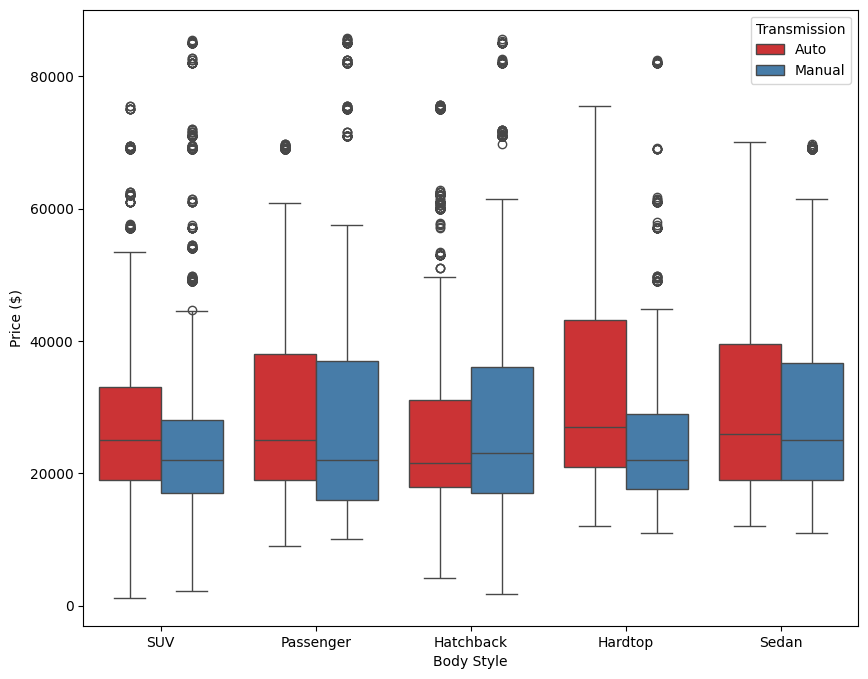

In [77]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Body Style', y = 'Price ($)', hue='Transmission', data=df2,palette="Set1" )
plt.show()

14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?



In [78]:
df2['Engine_Code'] = df2['Engine'].astype('category').cat.codes

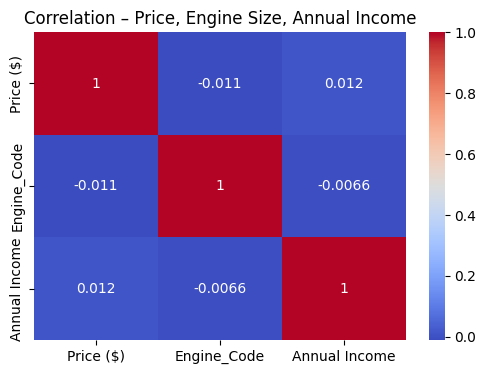

In [79]:
num_cols_car = ['Price ($)','Engine_Code','Annual Income']
plt.figure(figsize=(6,4))
sns.heatmap(df2[num_cols_car].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation – Price, Engine Size, Annual Income")
plt.show()


15. How does the average car price vary across different car models and engine types?

In [82]:
col = df2.groupby(['Engine','Model'])['Price ($)'].mean().sort_values(ascending=False)
pd.DataFrame(col)

Price ($)
Engine                    Model                 
Overhead Camshaft         SC        61074.818182
DoubleÂ Overhead Camshaft Ranger    61064.055556
Overhead Camshaft         Sable     61039.770833
DoubleÂ Overhead Camshaft Catera    56836.933333
Overhead Camshaft         LX470     54037.490196
...                                          ...
                          A4        12046.220000
DoubleÂ Overhead Camshaft Taurus    11665.538462
Overhead Camshaft         Escort    11403.866667
                          Intrepid  11069.882353
DoubleÂ Overhead Camshaft Mirage     9063.368421

[261 rows x 1 columns]

## Amazon Sales EDA


In [83]:
df3 = pd.read_csv("E:/amazon.csv")
df3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [96]:
import pandas as pd

# Convert numeric fields
df3['actual_price'] = pd.to_numeric(df3['actual_price'], errors='coerce')
df3['discounted_price'] = pd.to_numeric(df3['discounted_price'], errors='coerce')

# Remove % and convert discount_percentage
df3['discount_percentage'] = df3['discount_percentage'].str.replace('%','', regex=False)
df3['discount_percentage'] = pd.to_numeric(df3['discount_percentage'], errors='coerce')

# Convert rating and rating_count
df3['rating'] = pd.to_numeric(df3['rating'], errors='coerce')
df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors='coerce')

# Check dtypes
print(df3.dtypes)


product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage      int64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


In [84]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

1. What is the average rating for each product category?



In [97]:
df3[['category','rating','product_name']]

,category,rating,product_name
0,Computers&Accessories|Accessories&Peripherals|...,4.2,Wayona Nylon Braided USB to Lightning Fast Cha...
1,Computers&Accessories|Accessories&Peripherals|...,4.0,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
2,Computers&Accessories|Accessories&Peripherals|...,3.9,Sounce Fast Phone Charging Cable & Data Sync U...
3,Computers&Accessories|Accessories&Peripherals|...,4.2,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...
4,Computers&Accessories|Accessories&Peripherals|...,4.2,Portronics Konnect L 1.2M Fast Charging 3A 8 P...
...,...,...,...
1460,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,4.0,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...
1461,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,4.1,Prestige Delight PRWO Electric Rice Cooker (1 ...
1462,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",3.6,Bajaj Majesty RX10 2000 Watts Heat Convector R...
1463,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",4.0,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...


In [101]:
avg_rating = df3.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

2. What are the top rating_count products by category?



In [104]:
import pandas as pd

df3['rating_count'] = pd.to_numeric(df3['rating_count'], errors='coerce')

# Check missing values
print(df3['rating_count'].isna().sum())


1139


In [105]:
df3_clean = df3.dropna(subset=['rating_count'])


In [106]:
top_products = (
    df3_clean
    .sort_values(['category','rating_count'], ascending=[True, False])
    .groupby('category')
    .head(1)[['category','product_name','rating_count']]
)

top_products




,category,product_name,rating_count
900,Computers&Accessories|Accessories&Peripherals|...,Lapster USB 3.0 sata Cable for 2.5 inch SSD an...,817.0
32,Computers&Accessories|Accessories&Peripherals|...,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,974.0
743,Computers&Accessories|Accessories&Peripherals|...,Amazon Basics Magic Slate 8.5-inch LCD Writing...,401.0
653,Computers&Accessories|Accessories&Peripherals|...,STRIFF Mpad Mouse Mat 230X190X3mm Gaming Mouse...,491.0
940,Computers&Accessories|Accessories&Peripherals|...,HP 330 Wireless Black Keyboard and Mouse Set w...,427.0
...,...,...,...
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992.0
1317,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,535.0
1424,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,KENT POWP-Sediment Filter 10'' Thread WCAP,490.0
808,OfficeProducts|OfficePaperProducts|Paper|Copy&...,BRUSTRO Copytinta Coloured Craft Paper A4 Size...,388.0


3. What is the distribution of discounted prices vs. actual prices?



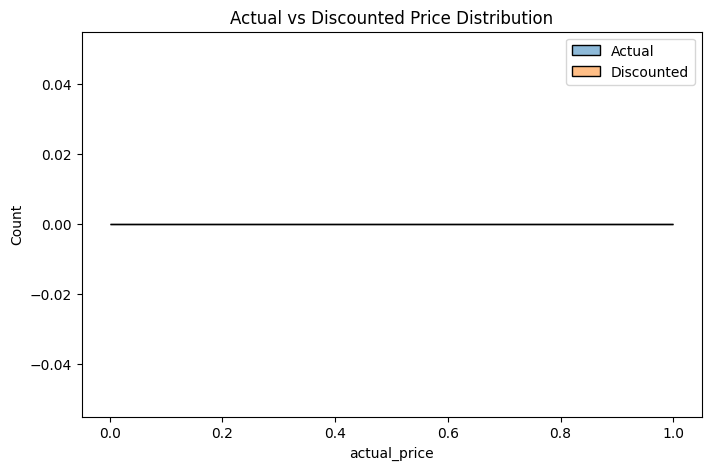

In [108]:
plt.figure(figsize=(8,5))
sns.histplot(df3['actual_price'], label='Actual', kde=True)
sns.histplot(df3['discounted_price'], label='Discounted', kde=True)
plt.legend()
plt.title("Actual vs Discounted Price Distribution")
plt.show()


4. How does the average discount percentage vary across categories?



In [109]:
avg_discount = df3.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
avg_discount


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                                              0.0
OfficeP

5. What are the most popular product names?



In [110]:
popular_products = df3['product_name'].value_counts().head(10)
popular_products


product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                     5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                              4
Flix Micro Usb Cable For Smartphone (Black)                                                                                                                                                   3
boAt Micro USB 55 Tangle-free, Sturdy Micro USB Cable with 3A Fast Charging & 480mbps Data Transmission (Black)                                                                               3
Portronics Konnect CL 20W POR-1067 Type-C to 8 Pin USB 1.2M Cable with Power Delivery & 3A Quick Charge Support, Nylon Braided for All Type-C and 8 Pin Devices, Green                        3
Portronics Konnect L 1.2M P

6. What are the most popular product keywords?



In [111]:
from collections import Counter
import re

words = df3['product_name'].dropna().str.lower().str.split()
common_words = Counter([word for sublist in words for word in sublist])

pd.DataFrame(common_words.most_common(10), columns=['Keyword','Count'])


,Keyword,Count
0,with,751
1,for,672
2,|,457
3,&,432
4,usb,377
5,and,330
6,cable,320
7,-,220
8,charging,219
9,to,218


7. What are the most popular product reviews?



In [112]:
df3.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [115]:
prod_review = df3['review_content'].value_counts().head(5)
prod_review


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a littl

8. What is the correlation between discounted_price and rating?


In [123]:
corr = df3[['discounted_price','rating']].corr()
corr

,discounted_price,rating
discounted_price,NaN,NaN
rating,NaN,1.0


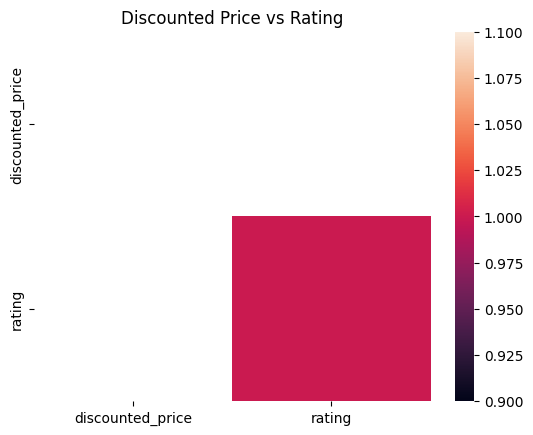

In [124]:
sns.heatmap(data=corr)
plt.title("Discounted Price vs Rating")
plt.show()



9. What are the Top 5 categories based on the highest ratings?



In [125]:
avg_rating = df3.groupby('category')['rating'].max().sort_values(ascending=False).head(5)
avg_rating

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables     5.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice        5.0
Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters      4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders               4.8
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers    4.8
Name: rating, dtype: float64

10. Identify any potential areas for improvement or optimization based on the data analysis.

In [126]:
low_rating_popular = df3[(df3['rating'] < 3.0) & (df3['rating_count'] > df3['rating_count'].median())]
low_rating_popular[['product_name','rating','rating_count']].head(20)


,product_name,rating,rating_count


In [127]:
df3['sales_proxy'] = df3['rating_count']
cat_perf = df3.groupby('category').agg(
    avg_rating=('rating','mean'),
    total_sales=('sales_proxy','sum')
).sort_values('avg_rating')
print(cat_perf.head(10))


                                                    avg_rating  total_sales
category                                                                   
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&...    3.300000        478.0
Computers&Accessories|Accessories&Peripherals|K...    3.400000          0.0
Electronics|HomeTheater,TV&Video|Accessories|3D...    3.500000        621.0
Computers&Accessories|Accessories&Peripherals|A...    3.500000          0.0
Computers&Accessories|Printers,Inks&Accessories...    3.600000          0.0
Computers&Accessories|Accessories&Peripherals|A...    3.600000          0.0
Home&Kitchen|Heating,Cooling&AirQuality|RoomHea...    3.600000       1127.0
Home&Kitchen|Kitchen&HomeAppliances|SewingMachi...    3.650000          0.0
Computers&Accessories|Printers,Inks&Accessories...    3.666667          0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...    3.671429        750.0


## Spotify EDA 


In [128]:
df4 = pd.read_csv("E:\spotify.csv")
df4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [129]:
df4.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

1. Read the dataframe, check null value if present then do the needful, check duplicate row, if present then do the needful.



In [131]:
df4 = pd.read_csv("E:\spotify.csv")
df4.isnull().sum()


Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [132]:
df4.duplicated().sum()

np.int64(27)

In [133]:
df4.drop_duplicates()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram,



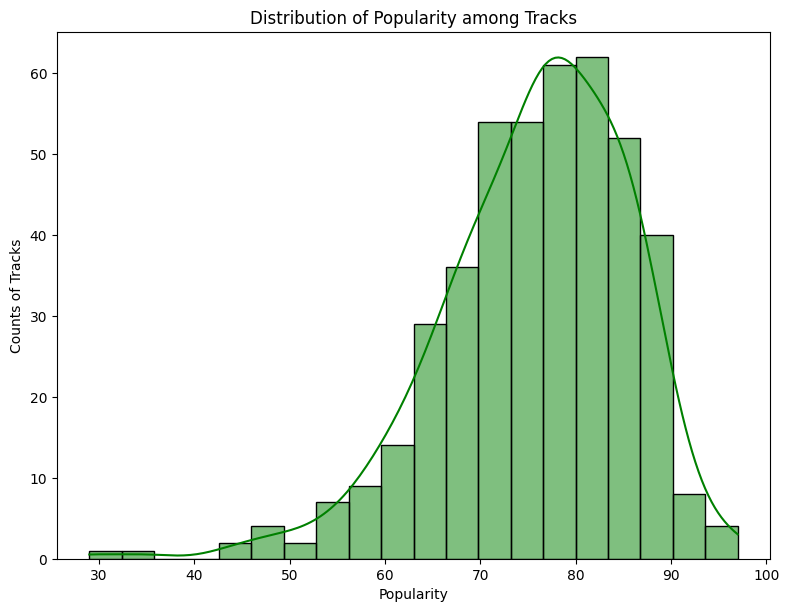

In [142]:
plt.figure(figsize=(8,6))
sns.histplot(x ='Popularity',data=df4,kde = True,color='green')
plt.xlabel('Popularity')
plt.ylabel("Counts of Tracks")
plt.tight_layout()
plt.title("Distribution of Popularity among Tracks")
plt.show()

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.



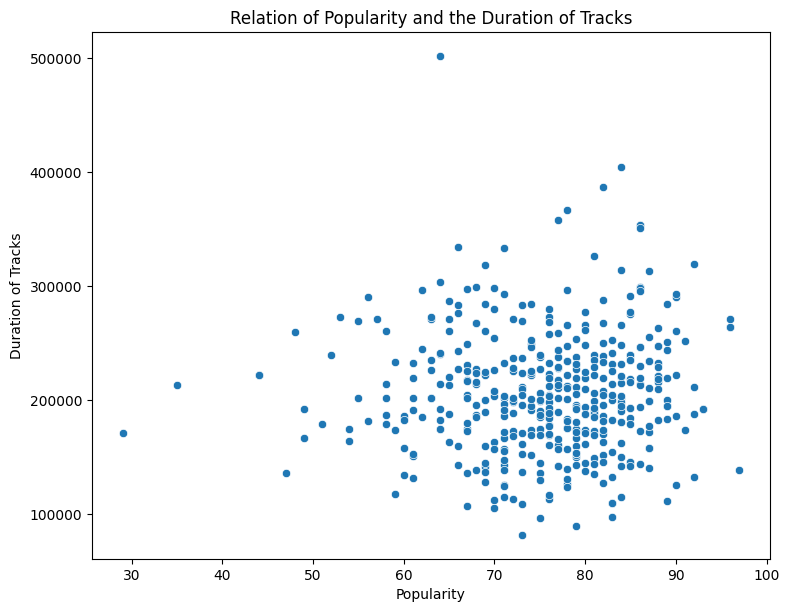

In [144]:
plt.figure(figsize=(8,6))
sns.scatterplot(x ='Popularity', y = 'Duration (ms)',data=df4,palette='Set2')
plt.xlabel('Popularity')
plt.ylabel("Duration of Tracks")
plt.tight_layout()
plt.title("Relation of Popularity and the Duration of Tracks")
plt.show()

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.



In [153]:
artist_count = df4['Artist'].value_counts()

# Artist with highest number of tracks
top_artist = artist_count.idxmax()
top_count = artist_count.max()

print("Artist with highest number of tracks:", top_artist)
print("Number of tracks:", top_count)


Artist with highest number of tracks: Drake
Number of tracks: 20


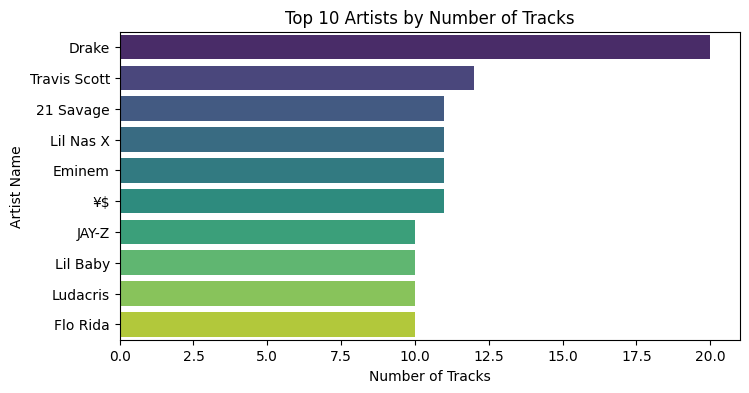

In [155]:
top10 = artist_count.head(10).reset_index()
top10.columns = ['Artist','Track_Count']

plt.figure(figsize=(8,4))
sns.barplot(data=top10, x='Track_Count', y='Artist',palette='viridis')
plt.title("Top 10 Artists by Number of Tracks")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist Name")
plt.show()


5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.



In [161]:
least_popular = df4.sort_values('Popularity', ascending=True)[['Artist','Track Name','Popularity']].head(5)
print(least_popular)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.


In [174]:
top5_artists = df4['Artist'].value_counts().head(5).index
top5_df = df4[df4['Artist'].isin(top5_artists)]

In [180]:
top_5_pop_art = top5_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
top_5_pop_art

Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64


7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist



In [190]:
top_tracks_by_artist = top5_df.sort_values('Popularity', ascending=False).groupby('Artist').head(1)
top_tracks_by_artist[['Artist','Track Name','Popularity']]


,Artist,Track Name,Popularity
70,21 Savage,redrum,96
282,Travis Scott,FE!N (feat. Playboi Carti),93
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92
80,Eminem,Without Me,90
312,Lil Nas X,THATS WHAT I WANT,81


8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.



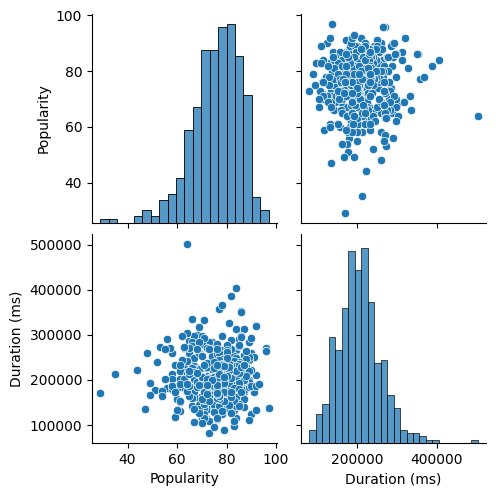

In [191]:
num_cols_sp = df4.select_dtypes(include=['int64','float64']).columns
sns.pairplot(df4[num_cols_sp])
plt.show()


9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.



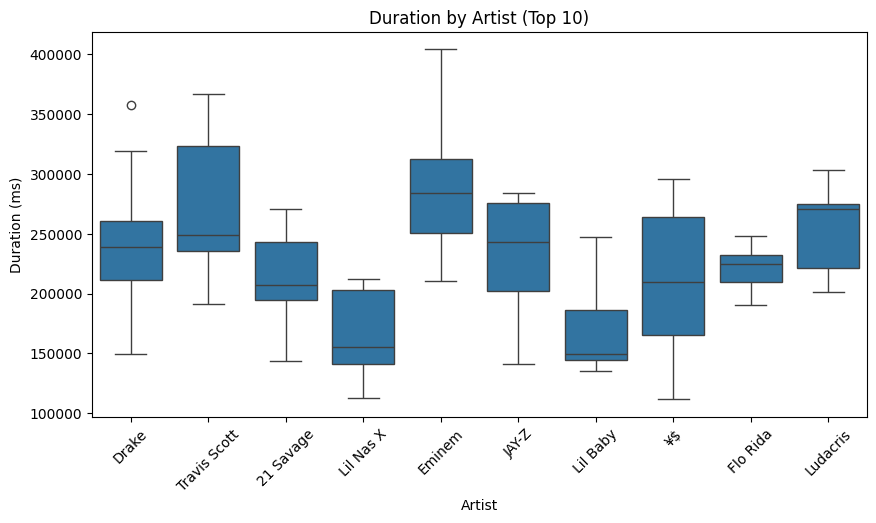

In [193]:
top10_artists = df4['Artist'].value_counts().head(10).index
top10_df = df4[df4['Artist'].isin(top10_artists)]

plt.figure(figsize=(10,5))
sns.boxplot(x='Artist', y='Duration (ms)', data=top10_df)
plt.xticks(rotation=45)
plt.title("Duration by Artist (Top 10)")
plt.show()


10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

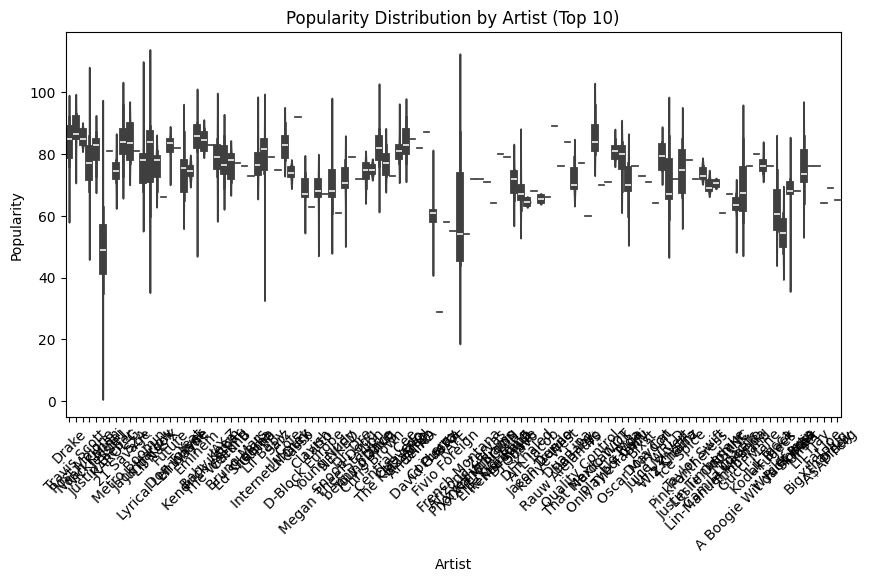

In [198]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Artist', y='Popularity', data=df4)
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Artist (Top 10)")
plt.show()


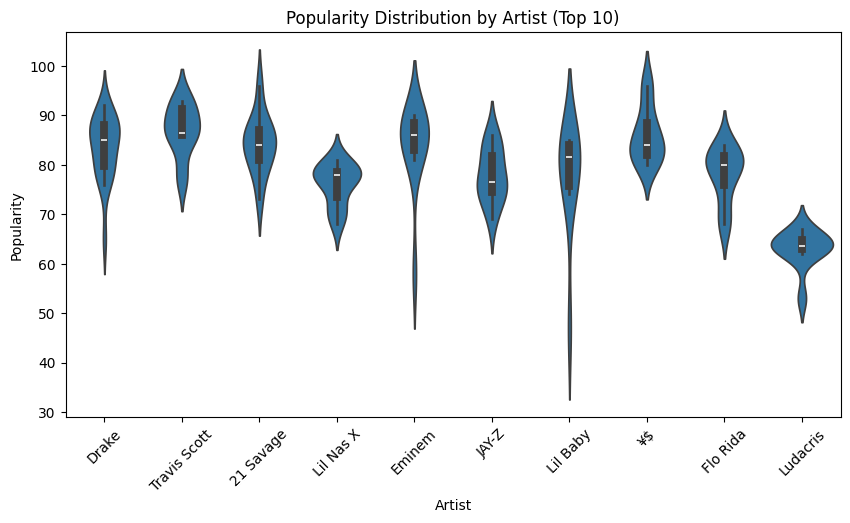

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Artist', y='Popularity', data=top10_df)
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Artist (Top 10)")
plt.show()
